0.1736111111111111j 0.02j


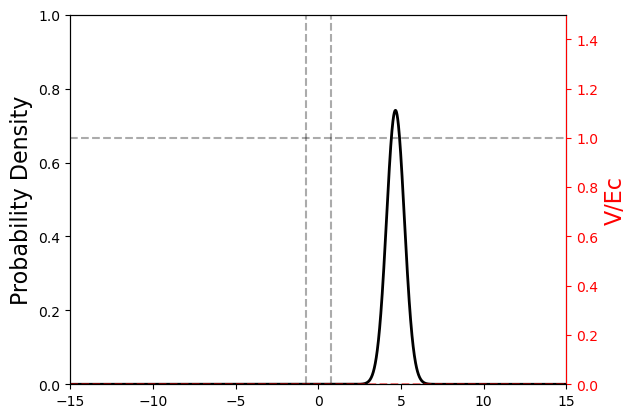

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Parametros
L = 30  # Tamaño del dominio (en unidades adimensionales)
N = 2500 # Numero de puntos espaciales
dx = L / N  # Paso espacial
xi = np.linspace(-L / 2, L / 2, N)  # Grid espacial en unidades adimensionales
dt = 0.001  # Paso temporal (en unidades adimensionales)
t_max = 4.5 # Tiempo final (tiempo maximo tuneleo)
t_steps = int(t_max / dt)  # Numero de pasos temporales



# Parámetros del paquete de ondas, función de onda input
xi0 = -4 # Posición inicial partícula
kappa_0 = 40 # Momento Inicial
psi0 = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(1j * kappa_0 * xi)



# Barrera de potencial
alpha_param =60 
v_0 =0 # Altura del potencial (V_0/Ec)
b = 0.75 # Grosor de la barrera (en unidades adimensionales, realmente es xi_b)
v = v_0 / (1 + np.abs(xi / b)**alpha_param)  # Forma explicita del potencial





# Matrices Crank-Nicolson 
alpha = 1j * dt / (kappa_0 * dx**2)  
beta = 1j * dt * kappa_0 / 2  
print(alpha,beta)

diagonal_a = (1 + alpha + beta * v) * np.ones(N)
off_diagonal = -(alpha / 2) * np.ones(N - 1)
A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

diagonal_b = (1 - alpha - beta * v) * np.ones(N)
B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")



# Inicialización de la función de onda
psi = psi0.copy()


# Solución del problema
for t in range(t_steps):
    psi = spsolve(A, B @ psi)

# Plot
fig, ax = plt.subplots()

# Plot de la densidad de probabilidad
ax.set_xlim(-L/2, L/2)
ax.set_ylim(0, 1)  
line, = ax.plot(xi, np.abs(psi)**2, label=f't={t_max}',color='k',linewidth=2) # plot de |psi|^2
ax.set_ylabel('Probability Density', size=16)

# Plot de la barrera
ax.plot(xi, v*(2/3), color='r', linestyle='--', label='Potential Barrier',alpha = 0.65 )

# Eje para la barrera
ax2 = ax.twinx()  
ax2.set_ylim(0, 1.5)  # Límite = max barrera pot
ax2.set_ylabel('V/Ec',color='r',size = 16)
ax2.tick_params(axis='y', colors='red')  
ax2.spines['right'].set_color('red') 


ax2.axhline(y=1, color='black', linestyle='--',alpha = 0.33)

plt.axvline(x=b, color='k', linestyle='--', alpha=0.33)
plt.axvline(x=-b, color='k', linestyle='--', alpha=0.33)










plt.show()

0.8680555555555556j 0.001j


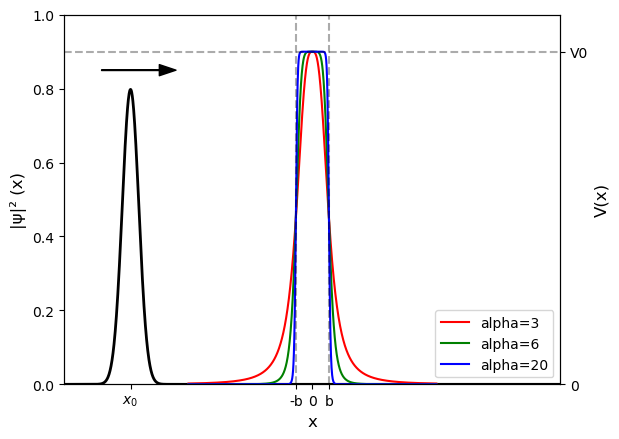

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Parametros
L = 30  # Tamaño del dominio (en unidades adimensionales)
N = 2500  # Numero de puntos espaciales
dx = L / N  # Paso espacial
xi = np.linspace(-L / 2, L / 2, N)  # Grid espacial en unidades adimensionales
dt = 0.0005  # Paso temporal (en unidades adimensionales)
t_max = 0  # Tiempo final (tiempo maximo tuneleo)
t_steps = int(t_max / dt)  # Numero de pasos temporales

# Parámetros del paquete de ondas, función de onda input
xi0 = -11  # Posición inicial partícula
kappa_0 = 4  # Momento Inicial
psi0 = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(1j * kappa_0 * xi)

# Altura y grosor de la barrera de potencial
v_0 = 1.35  # Altura del potencial (V_0/Ec)
b = 1  # Grosor de la barrera (en unidades adimensionales, realmente es xi_b)

# Matrices Crank-Nicolson 
alpha = 1j * dt / (kappa_0 * dx**2)  
beta = 1j * dt * kappa_0 / 2  
print(alpha, beta)

diagonal_a = (1 + alpha + beta * v_0) * np.ones(N)
off_diagonal = -(alpha / 2) * np.ones(N - 1)
A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

diagonal_b = (1 - alpha - beta * v_0) * np.ones(N)
B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")

# Inicialización de la función de onda
psi = psi0.copy()

# Solución del problema (t=0, no evolución en el tiempo)
for t in range(t_steps):
    psi = spsolve(A, B @ psi)

# Plot
fig, ax = plt.subplots()

# Plot de la densidad de probabilidad
ax.set_xlim(-L/2, L/2)
ax.set_ylim(0, 1)
line, = ax.plot(xi, np.abs(psi)**2, label=f't={t_max}', color='k', linewidth=2)  # plot de |psi|^2
ax.set_ylabel('|ψ|² (x)', size=12)

# Eje para la barrera
ax2 = ax.twinx()
ax2.set_ylim(0, 1.5)  # Límite = max barrera pot
ax2.set_ylabel('V(x)', color='k', size=12)
ax2.tick_params(axis='y', colors='k')
ax2.spines['right'].set_color('k')

# Valores de alpha a plotear
alpha_values = [3, 6, 20]
colors = ['r', 'g', 'b']
linestyles = ['-', '-', '-']

# Plot de la barrera de potencial para diferentes alphas
for alpha_param, color, linestyle in zip(alpha_values, colors, linestyles):
    v = v_0 / (1 + np.abs(xi / b)**alpha_param)  # Forma explicita del potencial
    mask = (xi >= -7.5) & (xi <= 7.5)
    ax2.plot(xi[mask], v[mask], color=color, linestyle=linestyle, label=f'alpha={alpha_param}', alpha=1)

# Añadir leyenda para la barrera
ax2.legend(loc='lower right')

# Líneas adicionales
ax2.axhline(y=v_0, color='black', linestyle='--', alpha=0.33)
plt.axvline(x=b, color='k', linestyle='--', alpha=0.33)
plt.axvline(x=-b, color='k', linestyle='--', alpha=0.33)
ax.set_xlabel('x', fontsize=12)
ax.annotate('', xy=(xi0 + 3, 0.85), xytext=(xi0 - 2, 0.85),
            arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=8))
ax.set_xticks([0, -11, -b, b])  # Set ticks at x = 0 and x = -11
ax.set_xticklabels(['0', '$x_0$', '-b', 'b'])
ax2.set_yticks ([0,1.35])
ax2.set_yticklabels (['0','V0'])

plt.show()


0.06944444444444445j 0.05j


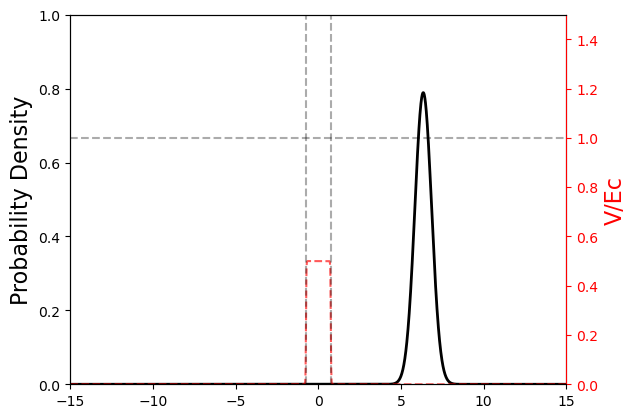

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Parametros
L = 30  # Tamaño del dominio (en unidades adimensionales)
N = 2500 # Numero de puntos espaciales
dx = L / N  # Paso espacial
xi = np.linspace(-L / 2, L / 2, N)  # Grid espacial en unidades adimensionales
dt = 0.001  # Paso temporal (en unidades adimensionales)
t_max = 7 # Tiempo final (tiempo maximo tuneleo)
t_steps = int(t_max / dt)  # Numero de pasos temporales



# Parámetros del paquete de ondas, función de onda input
xi0 = -4 # Posición inicial partícula
kappa_0 = 100 # Momento Inicial
psi0 = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(1j * kappa_0 * xi)



# Barrera de potencial
alpha_param =60  
v_0 = 0.5 # Altura del potencial (V_0/Ec)
b = 0.75 # Grosor de la barrera (en unidades adimensionales, realmente es xi_b)
v = v_0 / (1 + np.abs(xi / b)**alpha_param)  # Forma explicita del potencial




# Matrices Crank-Nicolson 
alpha = 1j * dt / (kappa_0 * dx**2)  
beta = 1j * dt * kappa_0 / 2  
print(alpha,beta)

diagonal_a = (1 + alpha + beta * v) * np.ones(N)
off_diagonal = -(alpha / 2) * np.ones(N - 1)
A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

diagonal_b = (1 - alpha - beta * v) * np.ones(N)
B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")



# Inicialización de la función de onda
psi = psi0.copy()

# Inicialización de la norma en función de t
norma = []

# Solución del problema
for t in range(t_steps):
    psi = spsolve(A, B @ psi)

# Plot
fig, ax = plt.subplots()

# Plot de la densidad de probabilidad
ax.set_xlim(-L/2, L/2)
ax.set_ylim(0, 1)  
line, = ax.plot(xi, np.abs(psi)**2, label=f't={t_max}',color='k',linewidth=2) # plot de |psi|^2
ax.set_ylabel('Probability Density', size=16)

# Plot de la barrera
ax.plot(xi, v*(2/3), color='r', linestyle='--', label='Potential Barrier',alpha = 0.65 )

# Eje para la barrera
ax2 = ax.twinx()  
ax2.set_ylim(0, 1.5)  # Límite = max barrera pot
ax2.set_ylabel('V/Ec',color='r',size = 16)
ax2.tick_params(axis='y', colors='red')  
ax2.spines['right'].set_color('red') 


ax2.axhline(y=1, color='black', linestyle='--',alpha = 0.33)

plt.axvline(x=b, color='k', linestyle='--', alpha=0.33)
plt.axvline(x=-b, color='k', linestyle='--', alpha=0.33)


plt.show()

t=0
2.220446049250313e-16
0.0
0.0
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
3.3306690738754696e-16
4.440892098500626e-16
2.220446049250313e-16
0.0
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
0.0
2.220446049250313e-16
0.0
0.0
2.220446049250313e-16
0.0
0.0
1.1102230246251565e-16
4.440892098500626e-16
2.220446049250313e-16
0.0
2.220446049250313e-16
0.0
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
1.1102230246251565e-16
0.0
0.0
0.0
4.440892098500626e-16
0.0
4.440892098500626e-16
2.220446049250313e-16
2.220446049250313e-16
0.0
4.440892098500626e-16
4.440892098500626e-16
5.551115123125783e-16
1.1102230246251565e-16
0.0
3.3306690738754696e-16
0.0
2.220446049250313e-16
4.440892098500626e-16
0.0
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
0.0
0.0
0.0
4.440892098500626e-16
2.220446049250313e-16
6.661338147750939e-16
4.440892098500626e

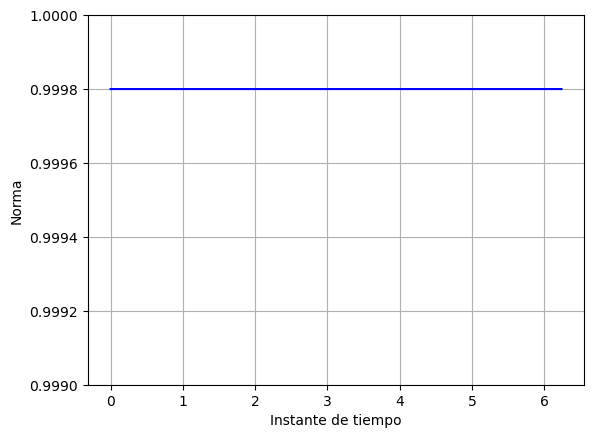

In [38]:
# Inicialización de la norma en función de t
norma = []
t_values = np.linspace (0, t_max, t_steps)

# Solución del problema
for t in range(t_steps):
    psi = spsolve(A, B @ psi)

    prob_density = np.abs(psi)**2

    # Integrar la densidad de probabilidad para obtener la probabilidad total
    prob_total = np.sum(prob_density) * dx  # Aproximación de la integral
    norma.append(prob_total)

for i in range(t_steps):
    if i == 0:
        print('t=0')
    else:
        print(abs(norma[i]-norma[i-1]))


plt.plot(t_values, norma, linestyle='-', color='b')
plt.xlabel('Instante de tiempo')
plt.ylabel('Norma')
plt.ylim(0.999, 1) 
plt.grid(True)
plt.show()

In [66]:
from scipy.integrate import quad
from scipy.interpolate import interp1d

# Calcular el índice correspondiente a x = b en la malla xi
b_index = np.where(xi >= b)[0][0]  # Primer índice donde xi >= b

# Densidad de probabilidad |psi(x,t)|^2 en la región x >= b
prob_density_right = np.abs(psi[b_index:])**2

# Interpolación de la densidad de probabilidad en la región x >= b
interp_prob_density = interp1d(xi[b_index:], prob_density_right, kind='cubic', fill_value="extrapolate")

# Integración de la densidad de probabilidad desde x = b hasta infinito (ultimo punto de la malla xi)
prob_tunel, error = quad(interp_prob_density, b, xi[-1])

print(f"Prob de túnel (x >= b): {prob_tunel}")
print(f"Error estimado: {error}")

Prob de túnel (x >= b): 0.11391100045060282
Error estimado: 6.4195955784388895e-09


In [76]:
from matplotlib.animation import FuncAnimation

t_max = 15
t_steps = int(t_max / dt) 

# Inicialización de la función de onda
psi = psi0.copy()

num_frames = 400  
steps_per_frame = t_steps // num_frames  

# Función para actualizar el gráfico en cada paso de tiempo
def update(frame):
    global psi
    for _ in range(steps_per_frame):  # Evoluciona la función de onda varios pasos en cada cuadro
        psi = spsolve(A, B @ psi)
    line.set_ydata(np.abs(psi)**2)  # Actualizar la densidad de probabilidad
    current_time = frame * steps_per_frame * dt
    ax.set_title(f't = {current_time:.3f}, b = {b}, L = {L}, v_0 = {v_0}, dt/dx² = {round(dt/(dx**2),5)}, N={N}')  # Actualizar el título 
    return line,

# Crear la animación
ani = FuncAnimation(fig, update, frames=num_frames, blit=True)

ani.save('tuneleo_animacion.mp4', writer='ffmpeg', fps=30)

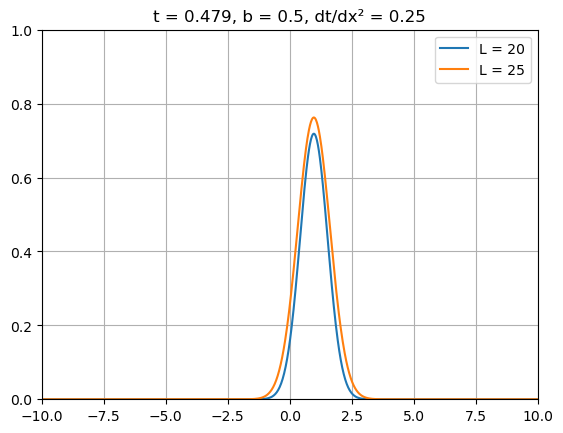

In [111]:
from scipy.interpolate import interp1d
from matplotlib.animation import FuncAnimation

# Parámetros generales
N = 1000  # Número de puntos espaciales fijo para ambas simulaciones
kappa_0 = 4
xi0 = 0
dt = 0.0001
L1 = 20  # Longitud de la región espacial para el primer valor de L
L2 = 25  # Longitud de la región espacial para el segundo valor de L

# Diferentes dx para cada L
dx1 = L1 / N  # Paso espacial para L1
dx2 = L2 / N  # Paso espacial para L2

# Mallas espaciales correspondientes a L1 y L2
xi1 = np.linspace(-L1 / 2, L1 / 2, N)
xi2 = np.linspace(-L2 / 2, L2 / 2, N)

# psi0 para ambos valores de L
psi0_1 = (2 / np.pi)**(1/4) * np.exp(-(xi1 - xi0)**2) * np.exp(1j * kappa_0 * xi1)
psi0_2 = (2 / np.pi)**(1/4) * np.exp(-(xi1 - xi0)**2) * np.exp(1j * kappa_0 * xi2)

# Definir los potenciales correspondientes a cada L
v1 = 0
v2 = 0

# Matrices Crank-Nicolson para ambos
alpha_1 = 1j * dt / (kappa_0 * dx1**2)
beta_1 = 1j * dt * kappa_0 / 2

diagonal_a1 = (1 + alpha_1 + beta_1 * v1) * np.ones(N)
off_diagonal_1 = -(alpha_1 / 2) * np.ones(N - 1)
A1 = diags([off_diagonal_1, diagonal_a1, off_diagonal_1], [-1, 0, 1], format="csr")

diagonal_b1 = (1 - alpha_1 - beta_1 * v1) * np.ones(N)
B1 = diags([-off_diagonal_1, diagonal_b1, -off_diagonal_1], [-1, 0, 1], format="csr")

# Mismas matrices para L2 con dx2
alpha_2 = 1j * dt / (kappa_0 * dx2**2)
beta_2 = 1j * dt * kappa_0 / 2

diagonal_a2 = (1 + alpha_2 + beta_2 * v2) * np.ones(N)
off_diagonal_2 = -(alpha_2 / 2) * np.ones(N - 1)
A2 = diags([off_diagonal_2, diagonal_a2, off_diagonal_2], [-1, 0, 1], format="csr")

diagonal_b2 = (1 - alpha_2 - beta_2 * v2) * np.ones(N)
B2 = diags([-off_diagonal_2, diagonal_b2, -off_diagonal_2], [-1, 0, 1], format="csr")

# Inicialización de psi para ambos
psi1 = psi0_1.copy()
psi2 = psi0_2.copy()

num_frames = 400  # Número de frames de la animación
steps_per_frame = t_steps // num_frames  # Pasos de tiempo por frame

# Función de interpolación para psi2 a la malla de xi1
def interpolate_psi2_to_xi1():
    return interp1d(xi2, np.abs(psi2)**2, kind='cubic', fill_value="extrapolate")(xi1)

# Función para actualizar el gráfico en cada paso de tiempo
def update(frame):
    global psi1, psi2
    for _ in range(steps_per_frame):  # Evoluciona la función de onda varios pasos en cada cuadro
        psi1 = spsolve(A1, B1 @ psi1)
        psi2 = spsolve(A2, B2 @ psi2)

    # Actualizar densidades de probabilidad para L1 y L2 interpolada
    line1.set_ydata(np.abs(psi1)**2)  # Densidad de probabilidad para L1
    line2.set_ydata(interpolate_psi2_to_xi1())  # Densidad interpolada de psi2 a la malla de psi1

    current_time = frame * steps_per_frame * dt
    ax.set_title(f't = {current_time:.3f}, b = {b}, dt/dx² = {round(dt/(dx1**2),5)}')

    return line1, line2,

# Inicializar el gráfico
fig, ax = plt.subplots()
line1, = ax.plot(xi1, np.abs(psi1)**2, label=f'L = {L1}')
line2, = ax.plot(xi1, interpolate_psi2_to_xi1(), label=f'L = {L2}')
ax.legend()
ax.set_xlim([-L1/2, L1/2])
ax.set_ylim([0, 1])
ax.grid(True)

# Crear la animación
ani = FuncAnimation(fig, update, frames=num_frames, blit=True)

# Guardar la animación
ani.save('comparacion_L1_L2.mp4', writer='ffmpeg', fps=30)


/tmp/ipykernel_6417/3438883067.py:10: RuntimeWarning: divide by zero encountered in divide
  v = v_0 / (1 + np.abs(xi / b)**alpha_param)  # Barrera de potencial dependiente de b


El valor de b para el cual la probabilidad de túnel es aproximadamente 0.5 es: 0.1479


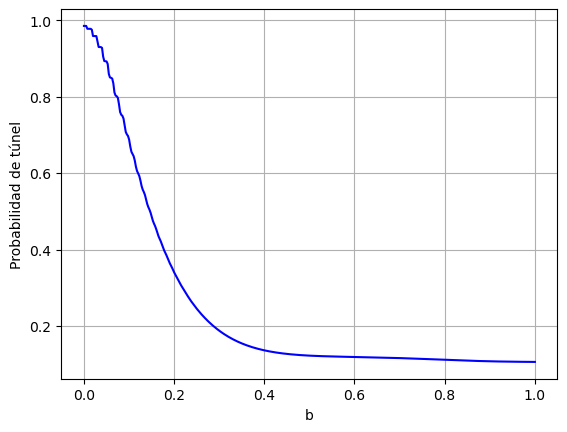

In [68]:
# Valores de b desde 0.01 hasta 1
b_values = np.linspace(0, 1, 400)  
prob_tunel_values = []  # Lista para almacenar las probabilidades de túnel


# Bucle sobre varios valores de b
for b in b_values:
    
    # Definir el potencial con el nuevo valor de b
    v = v_0 / (1 + np.abs(xi / b)**alpha_param)  # Barrera de potencial dependiente de b

    # Matrices Crank-Nicolson
    alpha = 1j * dt / (kappa_0 * dx**2)
    beta = 1j * dt * kappa_0 / 2

    diagonal_a = (1 + alpha + beta * v) * np.ones(N)
    off_diagonal = -(alpha / 2) * np.ones(N - 1)
    A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

    diagonal_b = (1 - alpha - beta * v) * np.ones(N)
    B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")

    # Inicialización de la función de onda
    psi = psi0.copy()

    # Evolución temporal
    for t in range(t_steps):
        psi = spsolve(A, B @ psi)

    # Calcular el índice correspondiente a x = b en la malla xi
    b_index = np.where(xi >= b)[0][0]  # Primer índice donde xi >= b fill_value="extrapolate"

    # Densidad de probabilidad |psi(x,t)|^2 en la región x >= b
    prob_density_right = np.abs(psi[b_index:])**2

    # Interpolación de la densidad de probabilidad en la región x >= b
    interp_prob_density = interp1d(xi[b_index:], prob_density_right, kind='cubic', fill_value="extrapolate")

    # Integración de la densidad de probabilidad desde x = b hasta infinito usando quad
    prob_tunel, error = quad(interp_prob_density, b, xi[-1])

    # Almacenar la probabilidad de túnel para este valor de b
    prob_tunel_values.append(prob_tunel)

# Convertir resultados a arrays de numpy
prob_tunel_values = np.array(prob_tunel_values)

# Imprimir el valor de b para el cual la probabilidad de túnel es 0.5
b_target = 0.5
closest_index = (np.abs(prob_tunel_values - b_target)).argmin()
b_at_target = b_values[closest_index]

print(f"El valor de b para el cual la probabilidad de túnel es aproximadamente 0.5 es: {b_at_target:.4f}")

# Graficar la probabilidad de túnel en función de b
plt.plot(b_values, prob_tunel_values, linestyle='-', color='b')
plt.xlabel('b')
plt.ylabel('Probabilidad de túnel')
plt.grid(True)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (50,) and (6,)

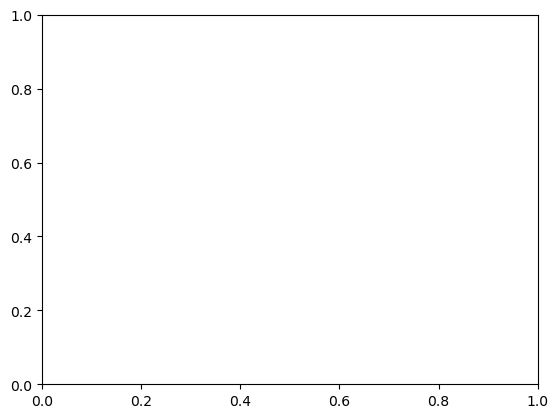

In [45]:
xi0_values = np.linspace(-4, -10, 6)  
prob_tunel_values = []  # Lista para almacenar las probabilidades de túnel

# Calcular el índice correspondiente a x = b en la malla xi
b_index = np.where(xi >= b)[0][0]  # Primer índice donde xi >= b fill_value="extrapolate"


# Bucle sobre varios valores de b
for xi0 in xi0_values:

    # Matrices Crank-Nicolson
    alpha = 1j * dt / (kappa_0 * dx**2)
    beta = 1j * dt * kappa_0 / 2

    diagonal_a = (1 + alpha + beta * v) * np.ones(N)
    off_diagonal = -(alpha / 2) * np.ones(N - 1)
    A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

    diagonal_b = (1 - alpha - beta * v) * np.ones(N)
    B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")

    # Inicialización de la función de onda
    psi = psi0.copy()

    # Evolución temporal
    for t in range(t_steps):
        psi = spsolve(A, B @ psi)



    # Densidad de probabilidad |psi(x,t)|^2 en la región x >= b
    prob_density_right = np.abs(psi[b_index:])**2

    # Interpolación de la densidad de probabilidad en la región x >= b
    interp_prob_density = interp1d(xi[b_index:], prob_density_right, kind='cubic', fill_value="extrapolate")

    # Integración de la densidad de probabilidad desde x = b hasta infinito usando quad
    prob_tunel, error = quad(interp_prob_density, b, xi[-1])

    # Almacenar la probabilidad de túnel para este valor de b
    prob_tunel_values.append(prob_tunel)

# Convertir resultados a arrays de numpy
prob_tunel_values = np.array(prob_tunel_values)

# Imprimir el valor de b para el cual la probabilidad de túnel es 0.5
b_target = 0.5
closest_index = (np.abs(prob_tunel_values - b_target)).argmin()
b_at_target = b_values[closest_index]

# Graficar la probabilidad de túnel en función de b
plt.plot(b_values, prob_tunel_values, linestyle='-', color='b')
plt.xlabel('xi0')
plt.ylabel('Probabilidad de túnel')
plt.grid(True)
plt.show()


525


/tmp/ipykernel_6825/2484920139.py:40: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  prob_tunel, error = quad(interp_prob_density, b, xi[-1])
/tmp/ipykernel_6825/2484920139.py:40: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  prob_tunel, error = quad(interp_prob_density, b, xi[-1])


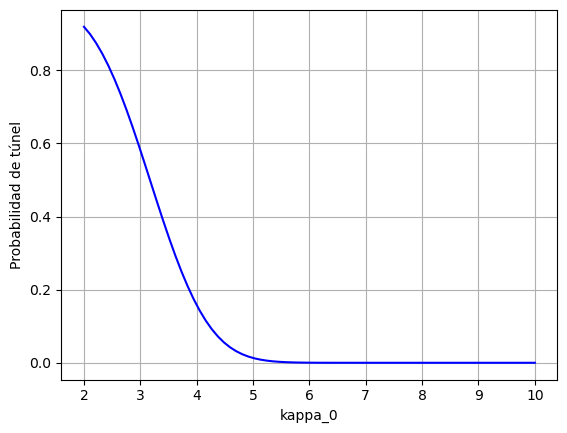

In [91]:
# Valores de kappa 
kappa_values = np.linspace(2, 10, 75)  

# Almacenar resultados de probabilidades de túnel
prob_tunel_values = []

# Calcular el índice correspondiente a x = fixed_b en la malla xi
b_index = np.where(xi >= b)[0][0]  # Primer índice donde xi >= fixed_b
print(b_index)


# Bucle sobre varios valores de kappa
for kappa_0 in kappa_values:
    
    # Matrices Crank-Nicolson
    alpha = 1j * dt / (kappa_0 * dx**2)
    beta = 1j * dt * kappa_0 / 2

    diagonal_a = (1 + alpha + beta * v) * np.ones(N)
    off_diagonal = -(alpha / 2) * np.ones(N - 1)
    A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

    diagonal_b = (1 - alpha - beta * v) * np.ones(N)
    B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")

    # Inicialización de la función de onda
    psi = psi0.copy()

    # Evolución temporal
    for t in range(t_steps):
        psi = spsolve(A, B @ psi)

    # Densidad de probabilidad |psi(x,t)|^2 en la región x >= fixed_b
    prob_density_right = np.abs(psi[b_index:])**2

    # Interpolación de la densidad de probabilidad en la región x >= fixed_b
    interp_prob_density = interp1d(xi[b_index:], prob_density_right, kind='cubic', fill_value="extrapolate")

    # Integración de la densidad de probabilidad desde x = fixed_b hasta infinito usando quad
    prob_tunel, error = quad(interp_prob_density, b, xi[-1])

    # Almacenar la probabilidad de túnel para este valor de kappa
    prob_tunel_values.append(prob_tunel)

# Convertir resultados a arrays de numpy
prob_tunel_values = np.array(prob_tunel_values)

# Graficar la probabilidad de túnel en función de kappa
plt.plot(kappa_values, prob_tunel_values, linestyle='-', color='b')
plt.xlabel('kappa_0')
plt.ylabel('Probabilidad de túnel')
plt.grid(True)
plt.show()

In [187]:
# Valores de dt a evaluar
dt_values = np.linspace(0.00001, 0.1, 250)  

# Almacenar resultados de probabilidades de túnel
prob_tunel_values = []

# Calcular el índice correspondiente a x = b en la malla xi
b_index = np.where(xi >= b)[0][0]  # Primer índice donde xi >= b

# Bucle sobre varios valores de dt
for dt in dt_values:
    t_max = 6.24  # Tiempo final
    t_steps = int(t_max / dt)  # Número de pasos temporales

    # Matrices Crank-Nicolson
    alpha = 1j * dt / (kappa_0 * dx**2)
    beta = 1j * dt * kappa_0 / 2

    diagonal_a = (1 + alpha + beta * v) * np.ones(N)
    off_diagonal = -(alpha / 2) * np.ones(N - 1)
    A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

    diagonal_b = (1 - alpha - beta * v) * np.ones(N)
    B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")

    # Inicialización de la función de onda
    psi = psi0.copy()

    # Evolución temporal
    for t in range(t_steps):
        psi = spsolve(A, B @ psi)




    # Densidad de probabilidad |psi(x,t)|^2 en la región x >= b
    prob_density_right = np.abs(psi[b_index:])**2

    # Interpolación de la densidad de probabilidad en la región x >=_b
    interp_prob_density = interp1d(xi[b_index:], prob_density_right, kind='cubic', fill_value="extrapolate")

    # Integración de la densidad de probabilidad desde x = b hasta infinito usando quad
    prob_tunel, error = quad(interp_prob_density, b, xi[-1])

    # Almacenar la probabilidad de túnel para este valor de dt
    prob_tunel_values.append(prob_tunel)

# Convertir resultados a arrays de numpy
prob_tunel_values = np.array(prob_tunel_values)


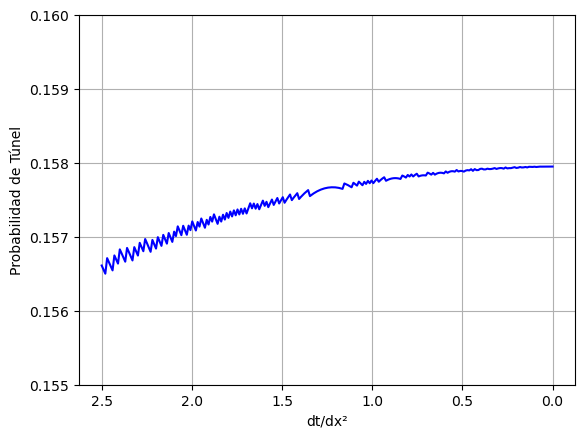

In [191]:
# Graficar la probabilidad de túnel en función de dt
plt.plot(dt_values/(dx), prob_tunel_values, linestyle='-', color='b')
plt.xlabel('dt/dx²')
plt.ylabel('Probabilidad de Túnel')
plt.ylim(0.15500, 0.160) 
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

In [10]:
# Valores de dt a evaluar
dt_values = np.linspace(0.00001, 0.1, 250)  
prob_total_values = []  # Lista para almacenar las probabilidades totales

# Bucle sobre varios valores de t_max
for t_max in t_max_values:
    t_steps = int(t_max / dt)  # Número de pasos temporales

    # Matrices Crank-Nicolson
    alpha = 1j * dt / (kappa_0 * dx**2)
    beta = 1j * dt * kappa_0 / 2

    diagonal_a = (1 + alpha + beta * v) * np.ones(N)
    off_diagonal = -(alpha / 2) * np.ones(N - 1)
    A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

    diagonal_b = (1 - alpha - beta * v) * np.ones(N)
    B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")

    # Inicialización de la función de onda
    psi = psi0.copy()

    # Evolución temporal
    for t in range(t_steps):
        psi = spsolve(A, B @ psi)

    # Densidad de probabilidad en toda la malla (de -infinito a infinito, o en la práctica en todo xi)
    prob_density = np.abs(psi)**2

    # Integrar la densidad de probabilidad para obtener la probabilidad total
    prob_total = np.sum(prob_density) * dx  # Aproximación de la integral
    prob_total_values.append(prob_total)

# Convertir resultados a arrays de numpy
prob_total_values = np.array(prob_total_values)

# Graficar la probabilidad total en función de t_max
plt.plot(t_max_values, prob_total_values, linestyle='-', color='b')
plt.xlabel('Tiempo máximo (t_max)')
plt.ylabel('Probabilidad total')
plt.ylim(0.5, 1.5) 
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [3]:
# Valores de dt a evaluar
dt_values = np.linspace(0.0001, 0.01, 50)  # Diferentes pasos temporales
prob_total_values = []  # Lista para almacenar las probabilidades totales

# Bucle sobre varios valores de dt
for dt in dt_values:
    t_steps = int(t_max / dt)  # Número de pasos temporales para el valor de dt

    # Matrices Crank-Nicolson
    alpha = 1j * dt / (kappa_0 * dx**2)
    beta = 1j * dt * kappa_0 / 2

    diagonal_a = (1 + alpha + beta * v) * np.ones(N)
    off_diagonal = -(alpha / 2) * np.ones(N - 1)
    A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

    diagonal_b = (1 - alpha - beta * v) * np.ones(N)
    B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")

    # Inicialización de la función de onda
    psi = psi0.copy()

    # Evolución temporal
    for t in range(t_steps):
        psi = spsolve(A, B @ psi)

    # Densidad de probabilidad en toda la malla
    prob_density = np.abs(psi)**2

    # Integrar la densidad de probabilidad para obtener la probabilidad total
    prob_total = np.sum(prob_density) * dx  # Aproximación de la integral
    prob_total_values.append(prob_total)

# Convertir resultados a arrays de numpy
prob_total_values = np.array(prob_total_values)



In [5]:
# Graficar la probabilidad total en función de dt
plt.plot(dt_values, prob_total_values, linestyle='-', color='b')
plt.xlabel('Paso Temporal (dt)')
plt.ylabel('Probabilidad total')
plt.ylim(0.998975, 0.99902) 
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

NameError: name 'dt_values' is not defined